NAMA  : RIKO FAJARUDIN


KODE PESERTA : PYTN-KS10-023

Langkah pertama adalah menentukan hipotesis

H0 : Jumlah kasus di Kota London berbanding lurus dengan seiring bertambahnya waktu per tahun?

H1 : Jumlah kasus di Kota London berbanding terbalik seiring bertambahnya waktu per tahun?

In [1]:
# mengimport library yang dibutuhkan
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
!pip install wordcloud
!pip3 install PyQt5==5.9.2
!pip install tk
from tkinter import *
from wordcloud import WordCloud, STOPWORDS
import sys
import seaborn as sns

ERROR: Could not find a version that satisfies the requirement PyQt5==5.9.2
ERROR: No matching distribution found for PyQt5==5.9.2


In [2]:
df = pd.read_csv('london_crime_by_lsoa.zip')
df

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6
...,...,...,...,...,...,...,...
13490599,E01000504,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,E01002504,Hillingdon,Robbery,Personal Property,1,2015,6
13490601,E01004165,Sutton,Burglary,Burglary in a Dwelling,0,2011,2
13490602,E01001134,Croydon,Robbery,Business Property,0,2011,5


In [3]:
df.shape

(13490604, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [5]:
kasus = df[df['value'] >= 1] 
kasus

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [6]:
kasus8 = kasus[kasus['year'] == 2008] 
kasus9 = kasus[kasus['year'] == 2009] 
kasus10 = kasus[kasus['year'] == 2010]
kasus11 = kasus[kasus['year'] == 2011]
kasus12 = kasus[kasus['year'] == 2012]
kasus13 = kasus[kasus['year'] == 2013] 
kasus14 = kasus[kasus['year'] == 2014]
kasus15 = kasus[kasus['year'] == 2015]
kasus16 = kasus[kasus['year'] == 2016]

In [7]:
sum8 = kasus8['value'].sum() 
sum9 = kasus9['value'].sum()
sum10 = kasus10['value'].sum()
sum11 = kasus11['value'].sum()
sum12 = kasus12['value'].sum()
sum13 = kasus13['value'].sum()
sum14 = kasus14['value'].sum()
sum15 = kasus15['value'].sum()
sum16 = kasus16['value'].sum()

In [8]:
df.drop('lsoa_code', axis=1, inplace=True)
df.head()

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,Wandsworth,Robbery,Personal Property,0,2008,6


**PERTANYAAN 1** : Berapa jumlah kasus kriminal di London pada tahun 2012 sampai 2016?

**LINE PLOT**

In [9]:
df_1 = df[df['year'] >= 2012]
df_1

,borough,major_category,minor_category,value,year,month
0,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,Bromley,Violence Against the Person,Other violence,0,2015,5
3,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
5,Ealing,Theft and Handling,Other Theft,0,2012,5
...,...,...,...,...,...,...
13490597,Brent,Theft and Handling,Theft/Taking of Pedal Cycle,0,2014,10
13490598,Hillingdon,Theft and Handling,Other Theft,0,2012,2
13490599,Brent,Criminal Damage,Criminal Damage To Dwelling,0,2015,2
13490600,Hillingdon,Robbery,Personal Property,1,2015,6


In [10]:
df_1.drop(['borough','major_category','minor_category'], axis=1, inplace=True)
df_1

c:\Users\USER DSC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,value,year,month
0,0,2016,11
1,0,2016,11
2,0,2015,5
3,0,2016,3
5,0,2012,5
...,...,...,...
13490597,0,2014,10
13490598,0,2012,2
13490599,0,2015,2
13490600,1,2015,6


In [11]:
mpl.style.use(['ggplot'])

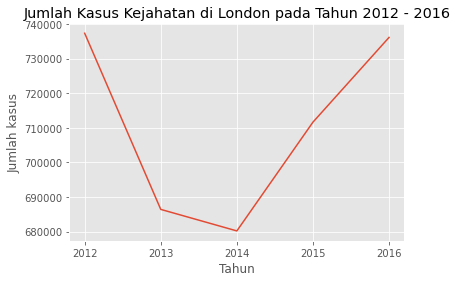

In [12]:
plt.plot(['2012', '2013', '2014', '2015', '2016'], [sum12, sum13, sum14, sum15, sum16])

plt.title('Jumlah Kasus Kejahatan di London pada Tahun 2012 - 2016')
plt.ylabel('Jumlah kasus')
plt.xlabel('Tahun')
plt.show()

Dari Line Plot di atas dapat disimpulkan bahwa jumlah kasus kejahatan di London pada Tahun 2012 sampai 2016 cenderung fluktuatif.

**AREA PLOT**

In [13]:
array_1 = np.array([['2012', '2013', '2014', '2015', '2016'], [sum12, sum13, sum14, sum15, sum16]])
array_1 = array_1.T
array_1

array([['2012', '737329'],
       ['2013', '686407'],
       ['2014', '680183'],
       ['2015', '711624'],
       ['2016', '736121']], dtype='<U21')

In [14]:
df_1 = pd.DataFrame(array_1, columns = ['tahun', 'jumlah kasus'])
df_1

,tahun,jumlah kasus
0,2012,737329
1,2013,686407
2,2014,680183
3,2015,711624
4,2016,736121


In [15]:
df_1.set_index('tahun', inplace=True)
df_1

,jumlah kasus
tahun,
2012,737329
2013,686407
2014,680183
2015,711624
2016,736121


In [16]:
df_1.dtypes

jumlah kasus    object
dtype: object

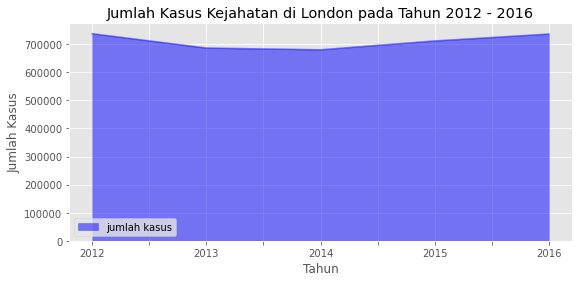

In [17]:
df_1.index = df_1.index.map(str)
df_1['jumlah kasus'] = df_1['jumlah kasus'].map(int)

df_1.plot(kind='area',
          stacked = False,
          figsize=(9,4),
          color = 'blue')

plt.title('Jumlah Kasus Kejahatan di London pada Tahun 2012 - 2016')
plt.ylabel('Jumlah Kasus')
plt.xlabel('Tahun')
plt.show()

Dari Area Plot di atas dapat disimpulkan bahwa jumlah kasus kejahatan di London pada Tahun 2012 sampai 2016 cenderung fluktuatif.

**PERTANYAAN 2** : Berapa jumlah kasus pada 5 daerah dengan jumlah kasus kejahatan terbesar di tahun 2011?

**BAR CHART**

In [18]:
df_2 = df[df['year'] == 2011]
df_2

,borough,major_category,minor_category,value,year,month
13,Wandsworth,Violence Against the Person,Offensive Weapon,0,2011,10
22,Hackney,Criminal Damage,Criminal Damage To Dwelling,0,2011,6
23,Enfield,Drugs,Possession Of Drugs,0,2011,5
77,Hackney,Criminal Damage,Other Criminal Damage,0,2011,7
78,Haringey,Robbery,Personal Property,2,2011,8
...,...,...,...,...,...,...
13490570,Wandsworth,Fraud or Forgery,Other Fraud & Forgery,0,2011,7
13490576,Tower Hamlets,Robbery,Personal Property,5,2011,3
13490585,Ealing,Violence Against the Person,Common Assault,0,2011,12
13490601,Sutton,Burglary,Burglary in a Dwelling,0,2011,2


In [19]:
df_2 = df_2.sort_values(by='borough')
df_2

,borough,major_category,minor_category,value,year,month
8415155,Barking and Dagenham,Violence Against the Person,Offensive Weapon,0,2011,9
12427136,Barking and Dagenham,Theft and Handling,Other Theft Person,0,2011,3
1893822,Barking and Dagenham,Violence Against the Person,Offensive Weapon,0,2011,8
8461641,Barking and Dagenham,Fraud or Forgery,Other Fraud & Forgery,0,2011,1
346934,Barking and Dagenham,Theft and Handling,Other Theft Person,0,2011,12
...,...,...,...,...,...,...
6944862,Westminster,Violence Against the Person,Harassment,3,2011,12
5203197,Westminster,Violence Against the Person,Common Assault,0,2011,10
5203165,Westminster,Fraud or Forgery,Counted per Victim,0,2011,12
6945088,Westminster,Violence Against the Person,Wounding/GBH,0,2011,1


In [20]:
df_2.drop(['major_category','minor_category','month'], axis=1, inplace=True)
df_2

,borough,value,year
8415155,Barking and Dagenham,0,2011
12427136,Barking and Dagenham,0,2011
1893822,Barking and Dagenham,0,2011
8461641,Barking and Dagenham,0,2011
346934,Barking and Dagenham,0,2011
...,...,...,...
6944862,Westminster,3,2011
5203197,Westminster,0,2011
5203165,Westminster,0,2011
6945088,Westminster,0,2011


In [21]:
kasus_2 = kasus[kasus['year'] == 2011]
kasus_2

,lsoa_code,borough,major_category,minor_category,value,year,month
78,E01002013,Haringey,Robbery,Personal Property,2,2011,8
127,E01004402,Waltham Forest,Violence Against the Person,Assault with Injury,1,2011,11
131,E01000549,Brent,Other Notifiable Offences,Going Equipped,1,2011,5
135,E01000936,Camden,Robbery,Personal Property,1,2011,11
155,E01003849,Richmond upon Thames,Theft and Handling,Theft From Motor Vehicle,1,2011,8
...,...,...,...,...,...,...,...
13490467,E01001274,Ealing,Burglary,Burglary in a Dwelling,2,2011,6
13490499,E01003350,Lewisham,Criminal Damage,Criminal Damage To Motor Vehicle,1,2011,5
13490507,E01003424,Merton,Burglary,Burglary in a Dwelling,2,2011,8
13490552,E01003836,Richmond upon Thames,Violence Against the Person,Assault with Injury,1,2011,7


In [22]:
df_2_top5 = kasus_2['borough'].value_counts().head()
df_2_top5

Lambeth      17131
Croydon      16743
Ealing       16096
Southwark    15893
Newham       15201
Name: borough, dtype: int64

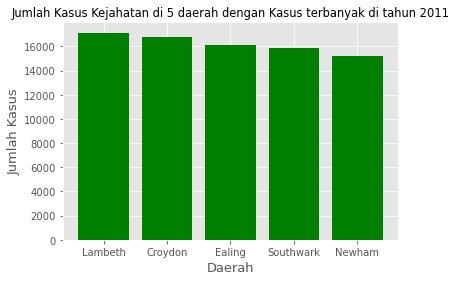

In [23]:
daerah = ['Lambeth', 'Croydon', 'Ealing', 'Southwark', 'Newham']
jumlah_kasus  = [17131, 16743, 16096, 15893, 15201]

plt.bar(daerah, jumlah_kasus, color='green')
plt.title('Jumlah Kasus Kejahatan di 5 daerah dengan Kasus terbanyak di tahun 2011', size=11.5)
plt.ylabel('Jumlah Kasus', size=13)
plt.xlabel('Daerah', size=13)
plt.xticks(size=10)
plt.yticks(size=10)

plt.show()

Dari barchart di atas dapat disimpulkan bahwa 5 daerah yang paling banyak kasus kejahatan di Kota London pada tahun 2011 adalah daerah Lambeth dengan 17131 kasus. Peringkat kedua ditempati oleh daerah Croydon dengan 16743 kasus, peringkat ketiga adalah daerah Ealing dengan 16096 kasus, peringkat keempat adalah daerah Southwark dengan 15893 kasus dan peringkat kelima ditempati oleh daerah Newham dengan 15201 kasus.

**PERTANYAAN 3** : Bagaimana distribusi kasus kriminal di London pada tahun 2008 sampai 2016?

**HISTOGRAM**

In [24]:
df_3 = kasus[kasus['year'] >= 2008]
df_3

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [25]:
df_3.drop(['month','lsoa_code','borough','major_category','minor_category'], axis=1, inplace=True)
df_3

,value,year
9,1,2016
16,1,2009
24,2,2012
25,1,2013
32,1,2016
...,...,...
13490581,3,2009
13490584,1,2015
13490590,1,2012
13490592,2,2013


In [26]:
df_3.sort_values('year')

,value,year
8872457,1,2008
12696847,1,2008
6545942,1,2008
6545943,1,2008
6545947,1,2008
...,...,...
8689663,1,2016
4726826,1,2016
12285585,1,2016
4726274,6,2016


In [27]:
array_2 = np.array([['2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015', '2016'], 
                     [sum8, sum9, sum10, sum11, sum12, sum13, sum14, sum15, sum16]])
array_2 = array_2.T
array_2

array([['2008', '738641'],
       ['2009', '717214'],
       ['2010', '715324'],
       ['2011', '724915'],
       ['2012', '737329'],
       ['2013', '686407'],
       ['2014', '680183'],
       ['2015', '711624'],
       ['2016', '736121']], dtype='<U21')

In [28]:
df_3 = pd.DataFrame(array_2, columns = ['tahun', 'jumlah_kasus'])
df_3


,tahun,jumlah_kasus
0,2008,738641
1,2009,717214
2,2010,715324
3,2011,724915
4,2012,737329
5,2013,686407
6,2014,680183
7,2015,711624
8,2016,736121


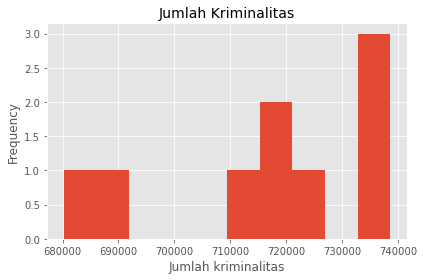

In [29]:
df_3.index = df_3.index.map(str)
df_3['jumlah_kasus'] = df_3['jumlah_kasus'].map(int)


plt.figure()
df_3['jumlah_kasus'].plot.hist()
plt.xlabel('Jumlah kriminalitas')
plt.title('Jumlah Kriminalitas', size=14)
plt.tight_layout()
plt.show()


Dari histogram di atas dapat disimpulkan bahwa jumlah kasus kriminalitas 737329 sampai 738641 memiliki frekueinsi tertinggi yaitu 3.00.

**PERTANYAAN 4** : Daerah apa yang memiliki kasus kejahatan terbanyak di kota London pada tahun 2012?

**WORDCLOUD**

In [30]:
df_4 = kasus[kasus['year'] == 2012]
df_4

,lsoa_code,borough,major_category,minor_category,value,year,month
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
62,E01002977,Kingston upon Thames,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,3
95,E01002093,Haringey,Violence Against the Person,Harassment,1,2012,3
148,E01003974,Southwark,Criminal Damage,Criminal Damage To Dwelling,1,2012,1
175,E01001012,Croydon,Theft and Handling,Theft From Motor Vehicle,9,2012,4
...,...,...,...,...,...,...,...
13490517,E01000292,Barnet,Theft and Handling,Theft From Shops,3,2012,6
13490534,E01003945,Southwark,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,7
13490537,E01001793,Hackney,Criminal Damage,Criminal Damage To Other Building,1,2012,7
13490545,E01004712,Westminster,Theft and Handling,Other Theft,17,2012,6


In [31]:
df_4.drop(['month','lsoa_code','year','major_category','minor_category','value'], axis=1, inplace=True)
df_4

c:\Users\USER DSC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,borough
24,Ealing
62,Kingston upon Thames
95,Haringey
148,Southwark
175,Croydon
...,...
13490517,Barnet
13490534,Southwark
13490537,Hackney
13490545,Westminster


In [32]:
df_4.to_csv('df_4.csv')

In [33]:
df_4.to_csv('df_4.txt', sep='\t')

In [34]:
df_4_1 = open('df_4.txt', 'r').read()

In [35]:
stopwords = set(STOPWORDS)

In [36]:

df_4 = df_4['borough'].value_counts()

In [37]:
stopwords.add('borough')
# inisiasi wordcloud
kasus_2012 = WordCloud(
    background_color='black',
    max_words=2000,
    stopwords=stopwords
)

# generate wordcloud
kasus_2012.generate(df_4_1)

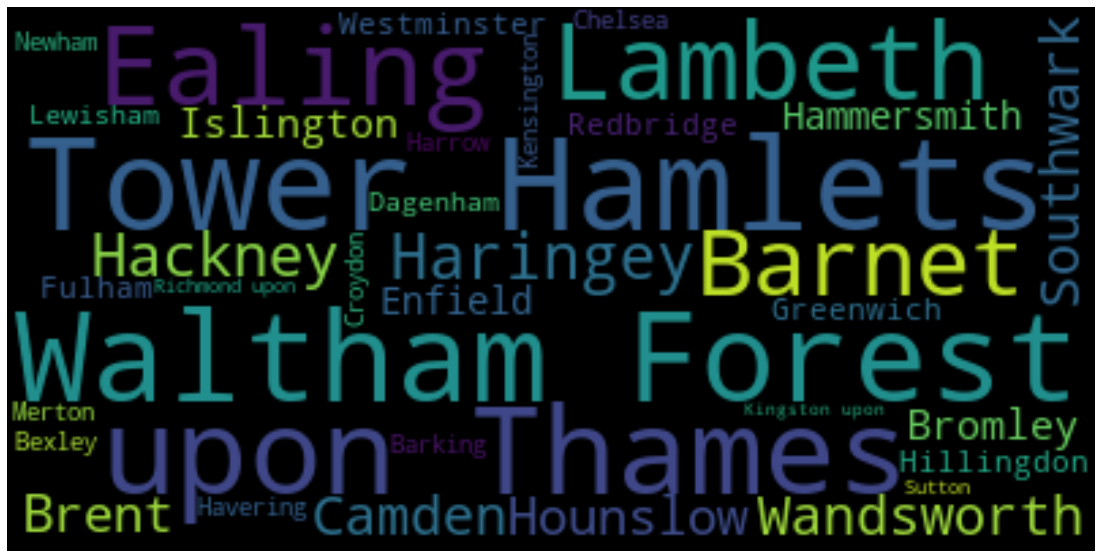

In [38]:
plt.figure(figsize=(20,10))
plt.imshow(kasus_2012, interpolation='bilinear');
plt.axis('off');

**PERTANYAAN 5** : Berapa banyak kasus dengan kategori Other Theft dari tahun 2011 sampai 2016?

**SCATTER PLOT**

In [39]:
df_5 = kasus[kasus['year'] >= 2011]
df_5

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490580,E01003154,Lambeth,Burglary,Burglary in a Dwelling,3,2015,10
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [40]:
df_5.drop(['month', 'borough','lsoa_code','major_category'], axis=1, inplace=True)
df_5

c:\Users\USER DSC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,minor_category,value,year
9,Theft/Taking of Pedal Cycle,1,2016
24,Other Theft Person,2,2012
25,Harassment,1,2013
32,Criminal Damage To Motor Vehicle,1,2016
43,Other Theft,1,2014
...,...,...,...
13490580,Burglary in a Dwelling,3,2015
13490584,Assault with Injury,1,2015
13490590,Theft/Taking Of Motor Vehicle,1,2012
13490592,Common Assault,2,2013


In [41]:
df_5 = df_5[df_5['minor_category'] == 'Other Theft']
df_5

,minor_category,value,year
43,Other Theft,1,2014
159,Other Theft,1,2014
288,Other Theft,2,2016
374,Other Theft,1,2014
441,Other Theft,7,2016
...,...,...,...
13490287,Other Theft,1,2011
13490295,Other Theft,2,2015
13490377,Other Theft,3,2014
13490394,Other Theft,4,2011


In [42]:
df_5['year'].value_counts()

2012    35691
2011    34071
2015    33479
2014    33293
2013    33238
2016    33190
Name: year, dtype: int64

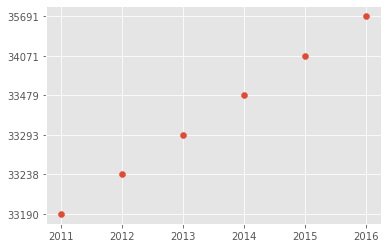

In [43]:
x = ['2011', '2012', '2013', '2014', '2015', '2016']
y = ['33190', '33238','33293','33479', '34071', '35691']
plt.scatter(x, y)

plt.show()

**PERTANYAAN 6** : Berapa persentase kasus kejahatan dengan kategori major pada tahun 2016 di Seluruh daerah London?

**PIE CHART**

In [44]:
df_6 = kasus[kasus['year'] == 2016]
df_6

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
64,E01003989,Southwark,Theft and Handling,Theft From Shops,4,2016,8
112,E01002276,Havering,Burglary,Burglary in a Dwelling,1,2016,8
224,E01003674,Redbridge,Drugs,Possession Of Drugs,2,2016,11
...,...,...,...,...,...,...,...
13490419,E01001661,Greenwich,Violence Against the Person,Assault with Injury,2,2016,1
13490439,E01002200,Harrow,Violence Against the Person,Common Assault,3,2016,3
13490458,E01001862,Hammersmith and Fulham,Theft and Handling,Theft/Taking Of Motor Vehicle,2,2016,4
13490469,E01003783,Redbridge,Drugs,Possession Of Drugs,5,2016,3


In [45]:
df_6.drop(['month','lsoa_code','borough','year','minor_category'], axis=1, inplace=True)
df_6

c:\Users\USER DSC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,major_category,value
9,Theft and Handling,1
32,Criminal Damage,1
64,Theft and Handling,4
112,Burglary,1
224,Drugs,2
...,...,...
13490419,Violence Against the Person,2
13490439,Violence Against the Person,3
13490458,Theft and Handling,2
13490469,Drugs,5


In [46]:
df_6 = df_6['major_category'].value_counts()

Text(0.5, 1.0, 'Persentase Kriminalitas dengan Kategori Major pada Tahun 2016 di Seluruh Daerah London')

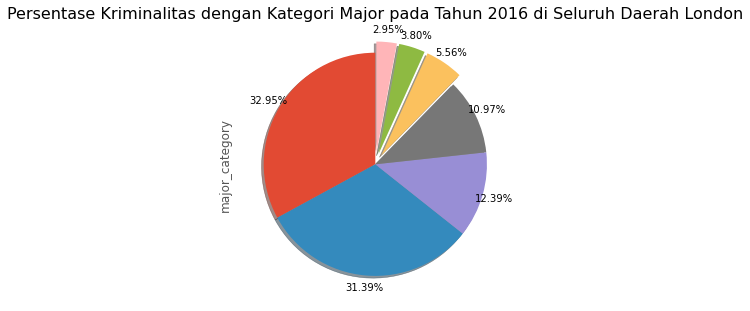

In [47]:
explode_list = [0,0,0,0,0.1,0.1,0.1]
df_6.plot(kind='pie',
            figsize=(5,6),
            autopct="%.2f%%",
            startangle=90,
            shadow=True,
            labels=None,
            pctdistance=1.11,
            explode=explode_list
            )
plt.title('Persentase Kriminalitas dengan Kategori Major pada Tahun 2016 di Seluruh Daerah London', size=16)

Persentase kriminalitas dengan kateagori major pada Tahun 2016 di London sangat bervariatif. Persentase paling tinggi adalah 32.95% dan yang paling rendah adalag 2.95%.

**PERTANYAAN 7** : Berapa banyak kasus dengan kategori Criminal Damage dari tahun 2012 sampai 2016?

In [48]:
df_7 = kasus[kasus['year'] >= 2012]
df_7

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
43,E01001193,Croydon,Theft and Handling,Other Theft,1,2014,5
...,...,...,...,...,...,...,...
13490580,E01003154,Lambeth,Burglary,Burglary in a Dwelling,3,2015,10
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [49]:
df_7.drop(['month','lsoa_code','borough','month','minor_category'], axis=1, inplace=True)
df_7

c:\Users\USER DSC\anaconda3\lib\site-packages\pandas\core\frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,major_category,value,year
9,Theft and Handling,1,2016
24,Theft and Handling,2,2012
25,Violence Against the Person,1,2013
32,Criminal Damage,1,2016
43,Theft and Handling,1,2014
...,...,...,...
13490580,Burglary,3,2015
13490584,Violence Against the Person,1,2015
13490590,Theft and Handling,1,2012
13490592,Violence Against the Person,2,2013


In [50]:
df_7 = df_7[df_7['major_category'] == 'Criminal Damage']
df_7

,major_category,value,year
32,Criminal Damage,1,2016
148,Criminal Damage,1,2012
274,Criminal Damage,5,2014
425,Criminal Damage,1,2012
446,Criminal Damage,1,2013
...,...,...,...
13490347,Criminal Damage,2,2012
13490454,Criminal Damage,1,2014
13490537,Criminal Damage,1,2012
13490558,Criminal Damage,2,2015


In [51]:
df_7['year'].value_counts()

2016    48584
2015    47936
2012    47667
2014    45688
2013    43613
Name: year, dtype: int64

In [52]:
df_7.set_index('year', inplace=True)
df_7


,major_category,value
year,,
2016,Criminal Damage,1
2012,Criminal Damage,1
2014,Criminal Damage,5
2012,Criminal Damage,1
2013,Criminal Damage,1
...,...,...
2012,Criminal Damage,2
2014,Criminal Damage,1
2012,Criminal Damage,1


In [53]:
df_7 = df_7['major_category'].value_counts()
df_7

Criminal Damage    233488
Name: major_category, dtype: int64

In [54]:
area_array = np.array([[ '2012','2013', '2014', '2015', '2016'], [47667, 43613, 45688, 47936, 48584]])
area_array = area_array.T
area_array

df_7 = pd.DataFrame(area_array, columns = ['tahun', 'major_category'])
df_7


,tahun,major_category
0,2012,47667
1,2013,43613
2,2014,45688
3,2015,47936
4,2016,48584


In [55]:
df_7.set_index('tahun',inplace=True)
df_7

,major_category
tahun,
2012,47667
2013,43613
2014,45688
2015,47936
2016,48584


In [56]:
df_7.describe()

,major_category
count,5
unique,5
top,47667
freq,1


Text(0.5, 0, 'Jumlah Kriminalitas')

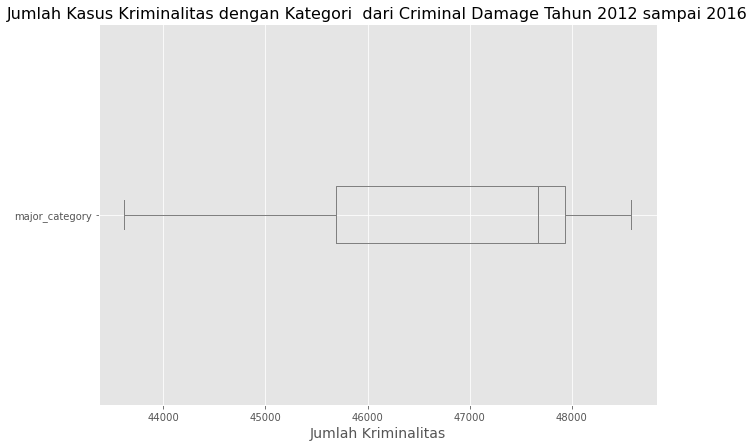

In [57]:
df_7.index = df_7.index.map(str)
df_7['major_category'] = df_7['major_category'].map(int)

df_7.plot(kind='box',
          figsize =(10,7),
          color = 'grey',
          vert = False)

plt.title('Jumlah Kasus Kriminalitas dengan Kategori  dari Criminal Damage Tahun 2012 sampai 2016', size=16)
plt.xlabel('Jumlah Kriminalitas', size=14)

Dari boxplot diatas bisa kita simpulkan bahwa data kasus kriminalitas dengan kategori Criminal Damage dari tahun 2012 sampai 2016 memiliki rata-rata 46697.6 dengan nilai minimal 43613, Q1 = 45688, Q2 atau median = 47667, Q3 = 47936 dan nilai maksimumnya adalah 48584.

## OVERALL ANALYSIS

Berdasarkan kesimpulan secara umum, Kasus Kriminalitas di kota London berbanding lurus seiring bertambahnya waktu. Hal tersebut dapat dibuktikan pada Line Plot dan Scatter Plot. Pernyataan tersebut ini juga dapat menjawab hipotesis yang artinya hipotesis dapat diterima